# Alpha Diversity Analysis

Measurement of within sample diversity.

In [10]:
import os
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
from scipy.stats import shapiro, kruskal, f_oneway

%matplotlib inline

In [3]:
# location of the data and all the results produced by this notebook 
data_dir = 'project_data'


if not os.path.isdir(data_dir):
    os.makedirs(data_dir) 

# 1. Data import

In [4]:
#filtered sequence
! wget -nv -O $data_dir/rep-seqs.qza 'https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=Sequences_rep_set.qza'

# Cleaned Meta data
! wget -nv -O $data_dir/table.qza 'https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=Feature_table.qza'

# Taxonomy file generate from silva
! wget -nv -O $data_dir/taxonomy_1.qza 'https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=taxonomy_1.qza'

# Phylogeny file 
! wget -nv -O $data_dir/fasttree-tree-rooted.qza 'https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=fasttree-tree-rooted.qza'

2022-11-16 13:44:15 URL:https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=Sequences_rep_set.qza [390624/390624] -> "project_data/rep-seqs.qza" [1]
2022-11-16 13:44:15 URL:https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=Feature_table.qza [504534/504534] -> "project_data/table.qza" [1]
2022-11-16 13:44:16 URL:https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=taxonomy_1.qza [303165/303165] -> "project_data/taxonomy_1.qza" [1]
2022-11-16 13:44:16 URL:https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=fasttree-tree-rooted.qza [249852/249852] -> "project_data/fasttree-tree-rooted.qza" [1]


### 1.1 Metadata

In [30]:
! wget -nv -O $data_dir/w3_data.zip 'https://polybox.ethz.ch/index.php/s/GaXxdQUQ7vcM7as/download'
metadata_df = pd.read_csv(f'project_data/sample_meta_data.tsv', sep='\t', index_col=0)
metadata_df.head()

2022-11-14 14:50:08 URL:https://polybox.ethz.ch/index.php/s/GaXxdQUQ7vcM7as/download [310849124/310849124] -> "project_data/w3_data.zip" [1]


,GEN_age_cat,GEN_age_corrected,GEN_bmi_cat,GEN_bmi_corrected,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_elevation,GEN_geo_loc_name,...,NUT_probiotic_frequency,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency
sampleid,,,,,,,,,,,,,,,,,,,,,
10317.000046,20s,20.0,Normal,23.75,False,2016-08-25 18:30:00,USA,True,1919.3,USA:CO,...,Rarely,Regularly,Occasionally,Rarely,Occasionally,Occasionally,Never,Never,Daily,Daily
10317.000050,Not provided,NaN,Overweight,25.61,False,2016-07-06 09:00:00,United Kingdom,False,65.5,United Kingdom:England,...,Rarely,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally
10317.000038,30s,39.0,Overweight,27.67,False,2016-06-29 09:30:00,United Kingdom,False,44.5,United Kingdom:England,...,Never,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally
10317.000047,50s,56.0,Normal,19.71,False,2016-07-12 17:30:00,Germany,False,8.7,Germany:HH,...,Daily,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly
10317.000046,40s,45.0,Normal,23.15,False,2016-05-24 19:00:00,United Kingdom,True,68.8,United Kingdom:Unspecified,...,Regularly,Never,Never,Occasionally,Never,Daily,Rarely,Occasionally,Regularly,Daily


### 1.2 Feature Table

Load feature table visulaisation produced in Sequence_import script:

In [7]:
! qiime feature-table summarize \
    --i-table $data_dir/table.qza \
    --m-sample-metadata-file $data_dir/sample_meta_data.tsv \
    --o-visualization $data_dir/table.qzv

Saved Visualization to: project_data/table.qzv


In [11]:
Visualization.load(f'{data_dir}/table.qzv')

<visualization: Visualization uuid: 18d5b966-ec5d-469d-a589-e8cd26f02f79>

### 1.3 Pre created phylogenetic tree

Load created phylogenetic tree _____ made in workbook XXX for our dataset. We need a pre-created phylogenetic tree for our dataset as some diversity metrics in our further analysis need to know the relatedness between sequences.

### here load the tree we make from HW 5!

In [12]:
! qiime empress tree-plot \
    --i-tree project_data/fasttree-tree-rooted.qza \
    --o-visualization $data_dir/fasttree-tree-rooted.qzv

Saved Visualization to: project_data/fasttree-tree-rooted.qzv


In [13]:
Visualization.load(f'{data_dir}/fasttree-tree-rooted.qzv')

<visualization: Visualization uuid: b03be5d5-1a83-4cae-9438-46aa1b9f9aa5>

# 2. Alpha rarefaction

To decide the threshold for rarefying interactive alpha rarefaction curves are produced with the alpha-rarefaction action.

! qiime diversity alpha-rarefaction \
    --i-table $data_dir/table.qza \#here insert the feature table from the sequence import script
    --i-phylogeny project_data/fasttree-tree-rooted.qza \#Here insert our created tree from our dataset
    --p-max-depth 20000 \#set the max depth to a reasonable value so not too much data gets lost
    --m-metadata-file project_data/sample_meta_data.tsv \#here load the metadata
    --o-visualization $data_dir/alpha-rarefaction.qzv

In [18]:
! qiime diversity alpha-rarefaction \
    --i-table $data_dir/table.qza \
    --i-phylogeny project_data/fasttree-tree-rooted.qza \
    --p-max-depth 20000 \
    --m-metadata-file project_data/sample_meta_data.tsv \
    --o-visualization $data_dir/alpha-rarefaction.qzv

Saved Visualization to: project_data/alpha-rarefaction.qzv


In [19]:
Visualization.load(f'{data_dir}/alpha-rarefaction.qzv')

<visualization: Visualization uuid: 00448498-9340-4b5d-b2b9-3b51e22d6458>

The top plot in the visulaization shows the alpha diversity over different sequencing depth in our data. When the curve reaches a plateau, higher sequencing depth would not result in a different estimated sample diversity metric.
The bottom plot visualizes the remaining sample count, when the feature table is rarefied to the specific sample depth shown on the x-axis.
The goal is to select a sequencing depth for rarefaction at which sample loss is minimized while alpha diversity is maximized. This serves as rarefying threshold in the folowing step. To define the rarefying threshold it was looked at the shannon index metric and the sample metadata columns: age category, host common name, race and sex.

Here sample depht 6'000 is choosen as at this depth the shannon index reaches the plateau for all relevant categories in alphadiversity while not too many samples are lost. By investigating the above created featrue table, 48.03% features in 92.16%  of the samples are kept in total at the sequencing depth of 6'000, by looking at the host common name. The investigated categories lose equivalent amount of smaples e.g. 19 samples from male and 22 samples from females are lost and the losses of the different age categories lies in the span of ~10 samples per category.


# 3. Diversity Analysis

Now the various diversity metrics at choosen raarefaction depth are outputted with the core-metrics-phylogenetic function. This function rarefies the feature table and at the same time calculated diversity metrics for it.

In [20]:
! qiime diversity core-metrics-phylogenetic \
  --i-table $data_dir/table.qza \
  --i-phylogeny $data_dir/fasttree-tree-rooted.qza \
  --m-metadata-file project_data/sample_meta_data.tsv \
  --p-sampling-depth 6000 \
  --output-dir $data_dir/core-metrics-results

Saved FeatureTable[Frequency] to: project_data/core-metrics-results/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: project_data/core-metrics-results/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: project_data/core-metrics-results/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: project_data/core-metrics-results/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: project_data/core-metrics-results/evenness_vector.qza
Saved DistanceMatrix to: project_data/core-metrics-results/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: project_data/core-metrics-results/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: project_data/core-metrics-results/jaccard_distance_matrix.qza
Saved DistanceMatrix to: project_data/core-metrics-results/bray_curtis_distance_matrix.qza
Saved PCoAResults to: project_data/core-metrics-results/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: project_data/core-metrics-results/weighted_unifrac_pcoa

## 3.1 Alpha diversity

### Association with categorical valiables

To test for significant differenced of alpha diversity we run the Kruskal-Wallis test to check which categorial variables form the metadata are strongly associated with the within sample diversity. (With the  `qiime diversity alpha-group-significance` function)

In [23]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $data_dir/sample_meta_data.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance.qzv

Saved Visualization to: project_data/core-metrics-results/faith-pd-group-significance.qzv


In [24]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance.qzv')

<visualization: Visualization uuid: 01a4a157-cac4-4ceb-a8a1-90398ef25268>

As per definition "the null hypothesis is that the medians of all groups are equal, and the alternative hypothesis is that at least one population median of one group is different from the population median of at least one other group. A significant Kruskal–Wallis test indicates that at least one sample stochastically dominates one other sample." (Wikipedia). As the columns geolocation, last travel, level of education, alcohol consumption!, alcohol frequency, red and white wine consumption!, drinks per session, homecooked meal frequency, (milk cheese frequency), olive oil!, prepared meal frequency, salted snack frequency, seafood frequency, vegetable frequency have a significant p-value(below 0.05), they are all associated with differences in microbial community richness.

### Association with numerical valiables

To make an additional test for significant differenced of alpha diversity we run the Spearman correlation test to check which numerical valiebles form the metadata are strongly associated with the within sample diversity. (with the `qiime diversity alpha-correlation` function)

In [25]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $data_dir/sample_meta_data.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance-numeric.qzv

Saved Visualization to: project_data/core-metrics-results/faith-pd-group-significance-numeric.qzv


In [26]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance-numeric.qzv')

<visualization: Visualization uuid: f5045f6a-0cd9-41b3-9450-efde4579849e>

From the Spearman correlation test it is observable that the categories GEN_age_corrected, GEN_elevation, GEN_height, GEN_latitude and GEN_longitude obtain significnat p-values (<0.05). This would suggest that these categories are associated with differences in microbial community richness. However, as for the categories GEN_elevation, GEN_height, GEN_latitude and GEN_longitude there are some outliers in the dataset this observation has to be taken with caution, so arguably only GEN_age_corrected is significantly correlated with differences in microbial community richness.

In [27]:
metadata_df.describe()

,sampleid,GEN_age_corrected,GEN_bmi_corrected,GEN_elevation,GEN_height_cm,GEN_latitude,GEN_longitude,GEN_weight_kg
count,523.000000,492.000000,508.000000,488.000000,517.000000,488.000000,488.000000,518.000000
mean,10317.000047,47.483740,24.124213,155.914754,174.615087,44.828689,-47.063320,69.685328
std,0.000009,15.798816,4.894094,327.503281,98.850353,9.959122,54.179516,19.566368
min,10317.000003,3.000000,11.200000,-0.900000,15.000000,-43.000000,-157.800000,3.000000
25%,10317.000043,37.000000,20.800000,25.200000,162.000000,38.900000,-101.100000,58.000000
50%,10317.000050,49.000000,23.505000,60.100000,170.000000,49.500000,-3.600000,69.000000
75%,10317.000052,59.000000,26.545000,127.425000,178.000000,51.600000,-0.600000,81.000000
max,10317.000062,81.000000,49.190000,2864.300000,1800.000000,57.500000,153.000000,175.000000


### ANOVA test

In [44]:
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/faith_pd_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'sample_meta_data.tsv'), sep='\t', index_col=0)['GEN_age_cat']

<AxesSubplot:>

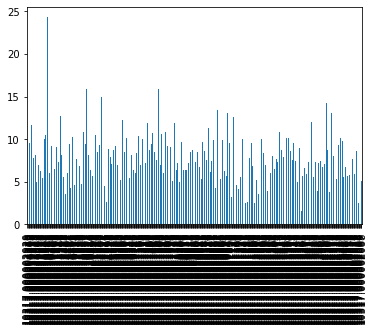

In [76]:
df=pd.DataFrame(div)
df['faith_pd'].plot(kind='bar')

Not sure if we can proceed with ANOVA as the faith pd values do not look normal distributied

# Check for normality of the datadistribution

As you can see on the plot above, the majority of values are focused around 0, with only some values being different. To get a more quantitative view of all the ASVs, we can additionally perform a statistical test for data normality. We will use _scipy_'s [implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) of the [Shapiro-Wilk test for normality](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test). 

In [5]:
data = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/faith_pd_vector.qza')).view(pd.Series)
data.head()

10317.000002929     9.388754
10317.000002930    12.979340
10317.000003283     6.899968
10317.000004079     9.575305
10317.000016169     7.592477
Name: faith_pd, dtype: float64

In [24]:
alpha = 0.05
results = {}

stat, p = shapiro(data)
results['Faith_pd'] = p
# convert test results into a DataFrame
results_df = pd.DataFrame(data=results.values(), index=results.keys(), columns=['p'])

# add a new column with a descriptive test result
results_df['is_normal'] = results_df['p'] > alpha

In [25]:
results_df

,p,is_normal
Faith_pd,4.906098e-12,False


Since the faith_pd values are not normaliy distributed, an ANOVA test can not be made due to ANOVA's normlaity assumption for data.